---

# <center>★ AI / ML Lesson - TF Dataset ★

---

<center><img src="TFDS.jpg" style="width: 1000px;"/>

---

### Description:

tensorflow_datasets (tfds) defines a collection of datasets ready-to-use with TensorFlow.

Each dataset is defined as a tfds.core.DatasetBuilder, which encapsulates the logic to download the dataset and construct an input pipeline, as well as contains the dataset documentation (version, splits, number of examples, etc.).

The main library entrypoints are:

tfds.builder: fetch a tfds.core.DatasetBuilder by name
tfds.load: convenience method to construct a builder, download the data, and create an input pipeline, returning a tf.data.Dataset.

### Acknowledgement: 
google, pyimagesearch, coursera, udemy, machinelearningmastery

### Objective:
- Build Deep Neural Network by using various types of Keras models.

---

# <center> TF Dataset:

Under the hood,using the naive approach, this is how your execution time was spent:
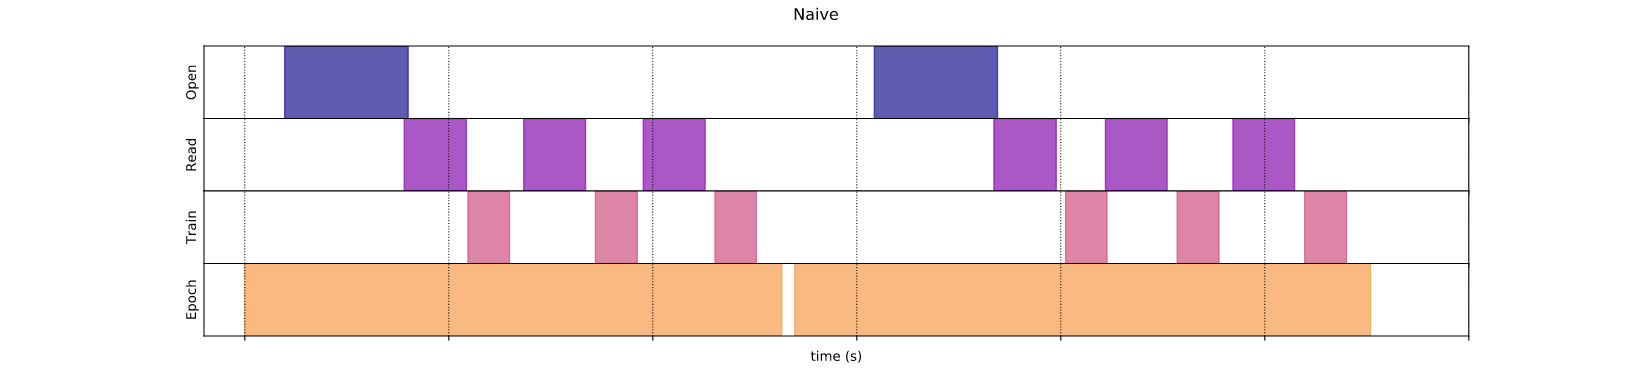

in a naive synchronous implementation like here, while your pipeline is fetching the data, your model is sitting idle. Conversely, while your model is training, the input pipeline is sitting idle. The training step time is thus the sum of opening, reading and training times.

* The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed.'
* The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. 
* You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.
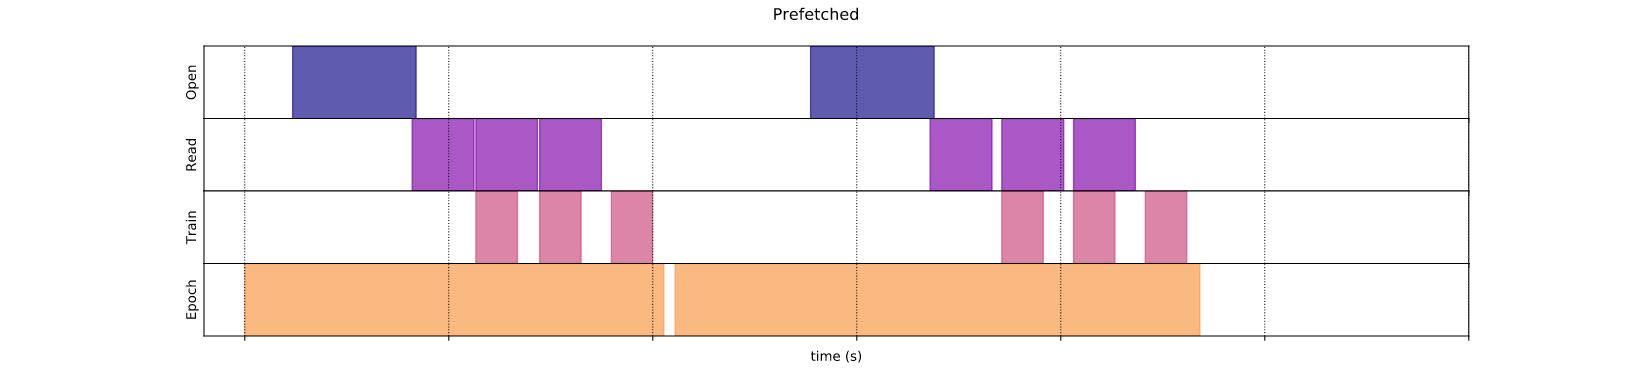

**There are two ways to create TF Dataset:**

1. API-Call
2. Custom Dataset

---

# <center>1. API Call

TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.

It handles downloading and preparing the data deterministically and constructing a tf.data.Dataset (or np.array).

Note: Do not confuse TFDS (this library) with tf.data (TensorFlow API to build efficient data pipelines). TFDS is a high level wrapper around tf.data. If you're not familiar with this API, we encourage you to read the official tf.data guide first.

Please find an example below for the same:

In [29]:
#Importing the basic librarires

import tensorflow  
from tensorflow.keras.datasets import mnist 

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=tf.expand_dims(x_train, -1)
x_test=tf.expand_dims(x_test, -1)

AUTOTUNE = tf.data.experimental.AUTOTUNE

#
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=len(y_train)).batch(32,drop_remainder=True).prefetch(buffer_size=AUTOTUNE))

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (test_dataset.batch(32,drop_remainder=False).prefetch(buffer_size=AUTOTUNE))

print(train_dataset)
print(test_dataset)

<PrefetchDataset shapes: ((32, 28, 28, 1), (32,)), types: (tf.float64, tf.uint8)>
<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>


---

# <center>2. Custom Dataset

All datasets are implemented as tfds.core.GeneratorBasedBuilder, a subclasses of tfds.core.DatasetBuilder which takes care of most boilerplate. It supports:

Small/medium datasets which can be generated on a single machine (this tutorial).
Very large datasets which require distributed generation (using Apache Beam, see our huge dataset guide)
Here is a minimal example of dataset class:

In [23]:
!pip install tensorflow-datasets

In [124]:
import glob
import tensorflow_datasets as tfds

# Creating custom class to build tensorflow dataset
class MyDataset(tfds.core.GeneratorBasedBuilder):
    """DatasetBuilder for my_dataset dataset."""

    VERSION = tfds.core.Version("1.0.0")
    RELEASE_NOTES = {
        "1.0.0": "Initial release.",
    }

    def _info(self) -> tfds.core.DatasetInfo:
        """Dataset metadata (homepage, citation,...)."""
        return tfds.core.DatasetInfo(
            builder=self,
            features=tfds.features.FeaturesDict(
                {
                    "image": tfds.features.Image(shape=(256, 256, 3)),
                    "label": tfds.features.ClassLabel(
                        names=["cat", "dog"]
                    ),
                }
            ),
        )

    def _split_generators(self, dl_manager):
        """Download the data and define splits."""
        #extracted_path = dl_manager.download_and_extract("http://data.org/data.zip")
        
        # dl_manager returns pathlib-like objects with `path.read_text()`,
        # `path.iterdir()`,...
        extracted_path = 'D:\\data\\Cats_and_Dogs\\dataset'
        return {
            "train": self._generate_examples(path=extracted_path+"\\training_set"),
            "test": self._generate_examples(path=extracted_path +"\\test_set"),
        }

    def _generate_examples(self, path):  # -> Iterator[Tuple[Key, Example]]
        """Generator of examples for each split."""
        for img_path in glob.glob(path+"\\*\\*jpg"):
            # Yields (key, example)
            yield img_path, {
                "image": img_path,
                "label": "cat" if "cat" in path else "dog",
            }

# Loading the tensorflow dataset
Dataset = tfds.load('MyDataset', with_info=True, as_supervised=False, shuffle_files=True)
Dataset #(data_dict, info)

({'train': <_OptionsDataset shapes: {image: (256, 256, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
  'test': <_OptionsDataset shapes: {image: (256, 256, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>},
 tfds.core.DatasetInfo(
     name='my_dataset',
     full_name='my_dataset/1.0.0',
     description="""
     
     """,
     homepage='https://www.tensorflow.org/datasets/catalog/my_dataset',
     data_path='C:\\Users\\Yasser\\tensorflow_datasets\\my_dataset\\1.0.0',
     download_size=Unknown size,
     dataset_size=217.63 MiB,
     features=FeaturesDict({
         'image': Image(shape=(256, 256, 3), dtype=tf.uint8),
         'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
     }),
     supervised_keys=None,
     disable_shuffling=False,
     splits={
         'test': <SplitInfo num_examples=2000, num_shards=1>,
         'train': <SplitInfo num_examples=8000, num_shards=2>,
     },
     citation="""""",
 ))

---